### Import libraries and dataframe

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
quandl.ApiConfig.api_key = 'jZTeF5qn5zkpnSfsWqyQ'

In [3]:
# file path
path = r'/Users/elliothaigh/Desktop/Data Analytics Course/Airlines Project'

In [4]:
# Load dataset
df = pd.read_pickle(os.path.join(path, '01 Data', 'flights_merged_categories.pkl'))

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,ORIGIN_AIRPORT_CODE,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_AIRPORT_CODE,DESTINATION_AIRPORT,DESTINATION_CITY,DESTINATION_STATE,DESTINATION_COUNTRY,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,DEPARTURE_DELAY_CATEGORY
0,2015,1,1,4,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure
1,2015,1,1,4,45,41.0,-4.0,17.0,58.0,204.0,194.0,173.0,1448,451.0,4.0,509,455.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure
2,2015,1,1,4,135,NaN,NaN,NaN,NaN,205.0,NaN,NaN,1448,NaN,NaN,600,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,NaN
3,2015,1,1,4,155,140.0,-15.0,17.0,157.0,218.0,198.0,170.0,1448,547.0,11.0,633,558.0,-35.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure
4,2015,1,1,4,220,209.0,-11.0,15.0,224.0,200.0,199.0,176.0,1448,620.0,8.0,640,628.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure


## Cleaning Time and Date Columns

The current formating for the numerous time and date columns are not uniform or useful so I will change their formating.

In [11]:
df['TimeFormatted'] = df['SCHEDULED_DEPARTURE'].astype(str).str.zfill(4)
df['TimeFormatted'] = pd.to_datetime(df['TimeFormatted'], format='%H%M', errors='coerce').dt.time

In [13]:
df.head(50)

,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,ORIGIN_AIRPORT_CODE,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_AIRPORT_CODE,DESTINATION_AIRPORT,DESTINATION_CITY,DESTINATION_STATE,DESTINATION_COUNTRY,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,DEPARTURE_DELAY_CATEGORY,TimeFormatted
0,2015,1,1,4,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure,00:05:00
1,2015,1,1,4,45,41.0,-4.0,17.0,58.0,204.0,194.0,173.0,1448,451.0,4.0,509,455.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure,00:45:00
2,2015,1,1,4,135,NaN,NaN,NaN,NaN,205.0,NaN,NaN,1448,NaN,NaN,600,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,NaN,01:35:00
3,2015,1,1,4,155,140.0,-15.0,17.0,157.0,218.0,198.0,170.0,1448,547.0,11.0,633,558.0,-35.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure,01:55:00
4,2015,1,1,4,220,209.0,-11.0,15.0,224.0,200.0,199.0,176.0,1448,620.0,8.0,640,628.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure,02:20:00
5,2015,1,1,4,505,457.0,-8.0,16.0,513.0,205.0,199.0,179.0,1448,912.0,4.0,930,916.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure,05:05:00
6,2015,1,1,4,700,653.0,-7.0,16.0,709.0,210.0,202.0,179.0,1448,1108.0,7.0,1130,1115.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure,07:00:00
7,2015,1,1,4,1035,1027.0,-8.0,21.0,1048.0,207.0,206.0,180.0,1448,1448.0,5.0,1502,1453.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure,10:35:00
8,2015,1,1,4,1340,1330.0,-10.0,18.0,1348.0,195.0,195.0,171.0,1448,1739.0,6.0,1755,1745.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure,13:40:00
9,2015,1,1,4,1430,1424.0,-6.0,7.0,1431.0,200.0,189.0,175.0,1448,1826.0,7.0,1850,1833.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure,14:30:00


In [14]:
df['TimeFormatted2'] = df['DEPARTURE_TIME'].apply(lambda x: f"{int(x // 100):02}:{int(x) % 100:02}" if pd.notna(x) else None)


In [16]:
df['DEPARTURE_TIME'] = df['TimeFormatted2']
df['SCHEDULED_DEPARTURE'] = df['TimeFormatted']

In [19]:
columns_to_drop = ['TimeFormatted', 'TimeFormatted2']
df = df.drop(columns=columns_to_drop)

In [22]:
df['TimeFormatted'] = df['SCHEDULED_ARRIVAL'].apply(lambda x: f"{x // 100:02}:{x % 100:02}")

In [24]:
df['SCHEDULED_ARRIVAL'] = df['TimeFormatted']

In [26]:
columns_to_drop = ['TimeFormatted']
df = df.drop(columns=columns_to_drop)

In [27]:
df['WO'] = df['WHEELS_OFF'].apply(lambda x: f"{int(x // 100):02}:{int(x) % 100:02}" if pd.notna(x) else None)

In [28]:
df['WON'] = df['WHEELS_ON'].apply(lambda x: f"{int(x // 100):02}:{int(x) % 100:02}" if pd.notna(x) else None)
df['AT'] = df['ARRIVAL_TIME'].apply(lambda x: f"{int(x // 100):02}:{int(x) % 100:02}" if pd.notna(x) else None)

In [29]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,ORIGIN_AIRPORT_CODE,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_AIRPORT_CODE,DESTINATION_AIRPORT,DESTINATION_CITY,DESTINATION_STATE,DESTINATION_COUNTRY,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,DEPARTURE_DELAY_CATEGORY,WO,WON,AT
0,2015,1,1,4,00:05:00,23:54,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,04:30,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure,00:15,04:04,04:08
1,2015,1,1,4,00:45:00,00:41,-4.0,17.0,58.0,204.0,194.0,173.0,1448,451.0,4.0,05:09,455.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure,00:58,04:51,04:55
2,2015,1,1,4,01:35:00,None,NaN,NaN,NaN,205.0,NaN,NaN,1448,NaN,NaN,06:00,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,NaN,None,None,None
3,2015,1,1,4,01:55:00,01:40,-15.0,17.0,157.0,218.0,198.0,170.0,1448,547.0,11.0,06:33,558.0,-35.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure,01:57,05:47,05:58
4,2015,1,1,4,02:20:00,02:09,-11.0,15.0,224.0,200.0,199.0,176.0,1448,620.0,8.0,06:40,628.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure,02:24,06:20,06:28


In [30]:
df['WHEELS_OFF'] = df['WO']
df['WHEELS_ON'] = df['WON']
df['ARRIVAL_TIME'] = df['AT']

In [32]:
columns_to_drop = ['WO', 'WON', 'AT']
df = df.drop(columns=columns_to_drop)

In [33]:
# combine Year, month and day to create a date column
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])

## Creating a subset for Time Series Analysis

In [39]:
# Create subset columns
columns = ['DEPARTURE_DELAY', 'DATE']

In [40]:
df_time_series = df[columns]

In [41]:
df_time_series.head()

,DEPARTURE_DELAY,DATE
0,-11.0,2015-01-01
1,-4.0,2015-01-01
2,NaN,2015-01-01
3,-15.0,2015-01-01
4,-11.0,2015-01-01


In [42]:
from datetime import datetime

df_time_series['datetime'] = pd.to_datetime(df_time_series['DATE']) # Create a datetime column from "Date.""
df_time_series = df_time_series.set_index('datetime') # Set the datetime as the index of the dataframe.
df_time_series.drop(['DATE'], axis=1, inplace=True) # Drop the "Date" column.# Drop the "Date" column.
df_time_series.head()

,DEPARTURE_DELAY
datetime,
2015-01-01,-11.0
2015-01-01,-4.0
2015-01-01,NaN
2015-01-01,-15.0
2015-01-01,-11.0


In [43]:
# Group by datetime column and show the count so we can see the number of flight delays on a given day
df_count = df_time_series.resample('D').count()

In [44]:
df_count.head()

,DEPARTURE_DELAY
datetime,
2015-01-01,13490
2015-01-02,16488
2015-01-03,15123
2015-01-04,15930
2015-01-05,16142


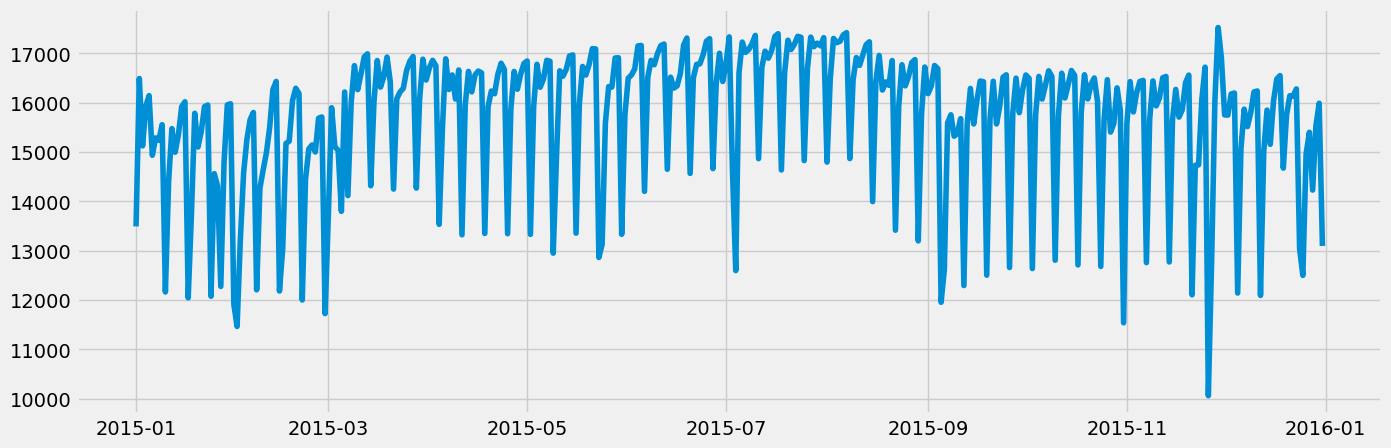

In [45]:
# Plot the new data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_count)

In [46]:
# Check for null values
df_count.isnull().sum() 

DEPARTURE_DELAY    0
dtype: int64

In [47]:
df_count = df_count.dropna()

In [48]:
# Check for duplicates

dups = df_count.duplicated()
dups.sum()

19

These are not duplicate values they are just multiple flights on the same day with the same delay.

## Time-series analysis: decomposition

In [49]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_count, model='additive')

In [50]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

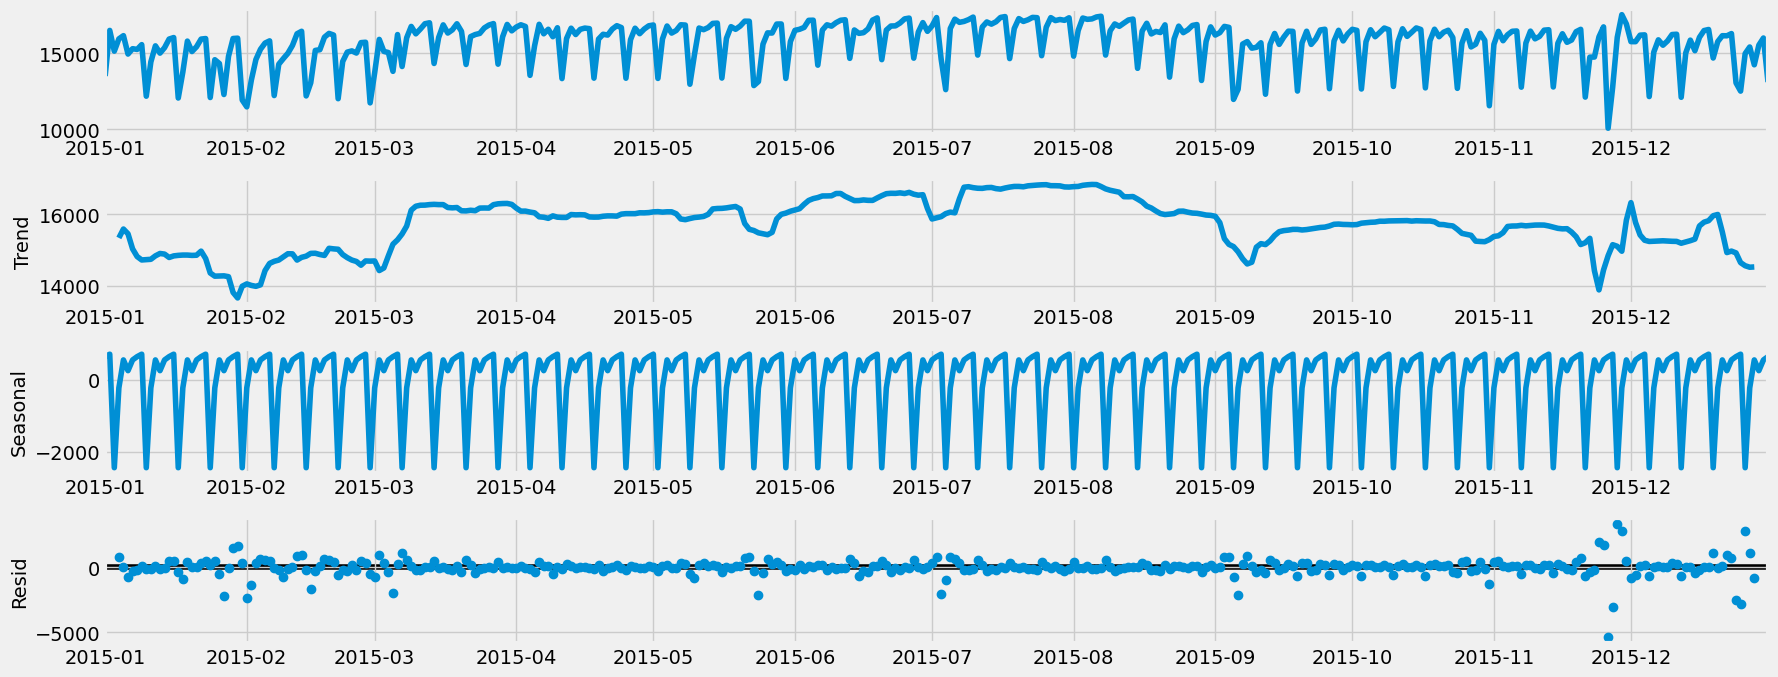

In [51]:
# Plot the separate components

timevis=decomposition.plot()
plt.show()

From the decomposition plot above we can clearly see that there is a definite pattern in the seasonality as the line repeats the same pattern throughout the course of the year. There also seems to be a fairly consistent pattern or peaks and dips in the first graph. This could be due to certain days of the week or time in the month being more popular for flying than others and therefore having more delays. The trend line is the most curious as there doesn't seem to be a clear pattern.

It is important to note that the data in our dataset is only from one year and thus the seasonality is difficult to comment on as we cannot compare to previous years data. 

## Testing for Stationarity 

In [100]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_count['DEPARTURE_DELAY'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.781625
p-value                          0.389622
Number of Lags Used             17.000000
Number of Observations Used    347.000000
Critical Value (1%)             -3.449337
Critical Value (5%)             -2.869906
Critical Value (10%)            -2.571227
dtype: float64


Our test statistic is -1.78 which is larger than our citical vlaue (5%) of -2.86 meaning that we cannot reject our null hypothesis. We have a p-vlaue less of 0.38 which indicates it is a significant result.

These results mean that our data is non-stationary and thus we need to take further steps of differencing.

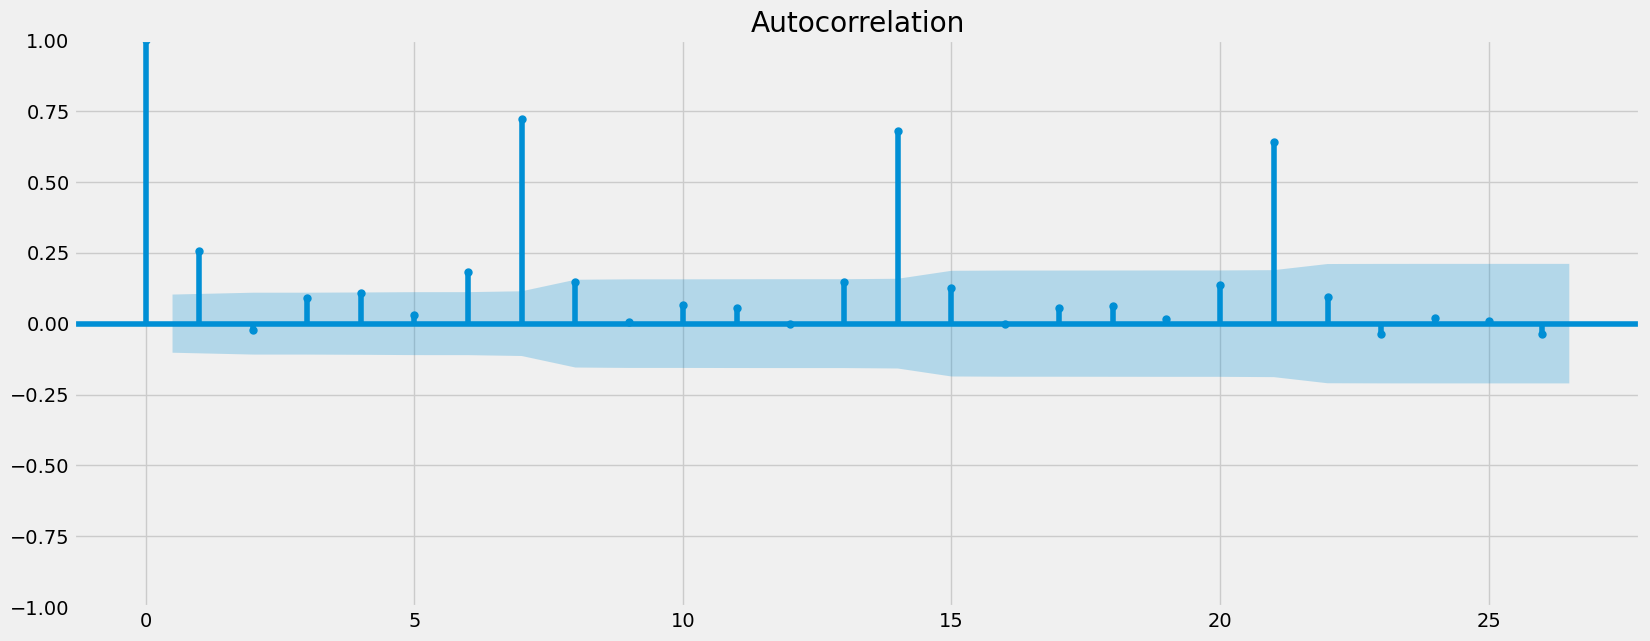

In [101]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_count)
plt.show()

## Stationarizing the Data

In [103]:
data_diff = df_count - df_count.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [104]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [105]:
data_diff.head()

,DEPARTURE_DELAY
datetime,
2015-01-02,2998.0
2015-01-03,-1365.0
2015-01-04,807.0
2015-01-05,212.0
2015-01-06,-1210.0


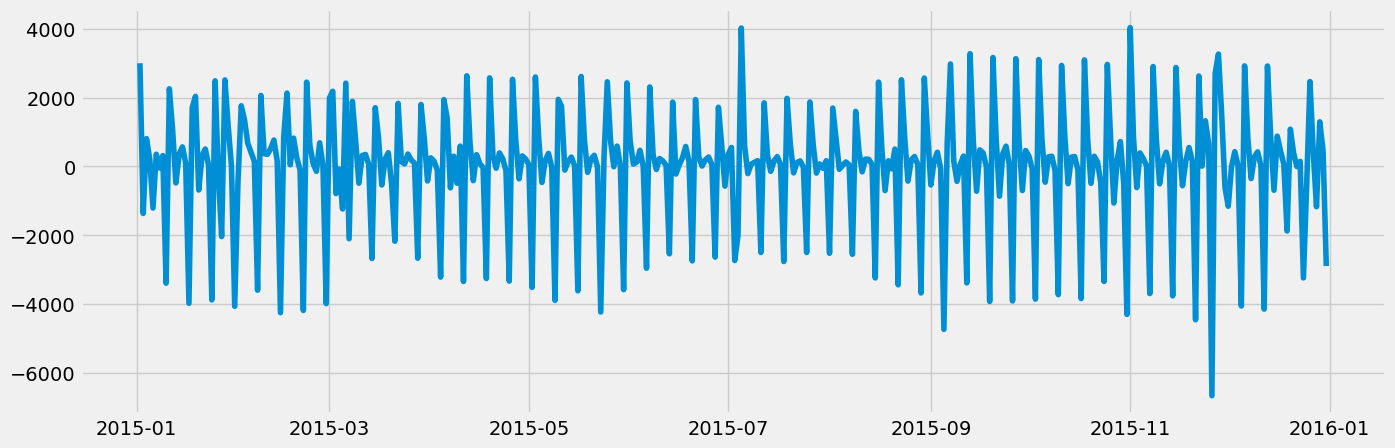

In [107]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [108]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -5.786843e+00
p-value                        4.976566e-07
Number of Lags Used            1.700000e+01
Number of Observations Used    3.460000e+02
Critical Value (1%)           -3.449392e+00
Critical Value (5%)           -2.869930e+00
Critical Value (10%)          -2.571240e+00
dtype: float64


After our round of differencing, we can now see that we have succesfully made our data stationary. Our test statistic is now significantly less than the critical values at all three values.

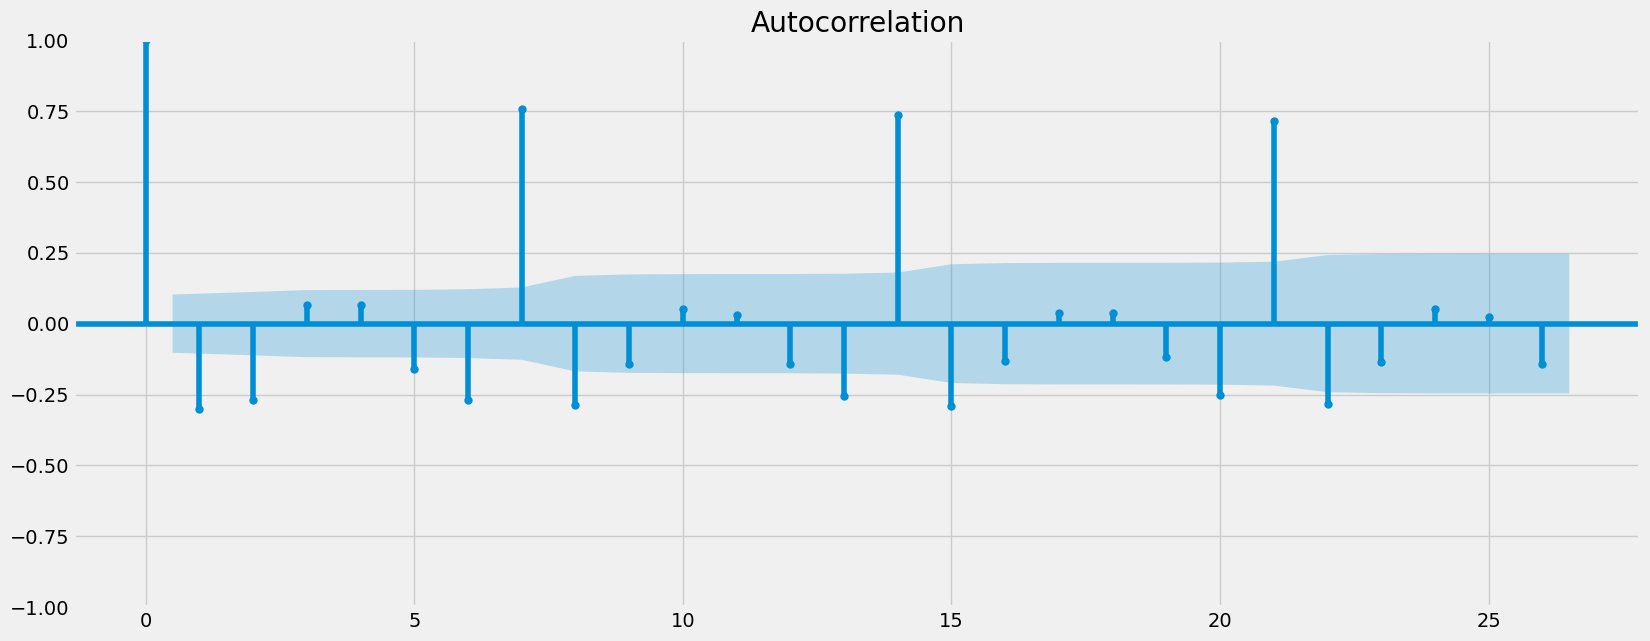

In [109]:
plot_acf(data_diff)
plt.show()

Our autocorrelation is not perfect as there are 4 lags that are significantly outside the confidence interval. However the majority are in the confidence interval and so although the autocorrelation shows our stationarity is somewhat weak, we have still succeeded in making our data stationary. 

### Save df and visuals

In [35]:
df.to_pickle(os.path.join(path, '01 Data', 'df_master.pkl'))

In [36]:
df.to_csv(os.path.join(path, '01 Data', 'df_master.csv'))

In [52]:
timevis.figure.savefig(os.path.join(path, '04. Visualizations','timevis.png'), bbox_inches='tight')